In [ ]:
# Avg. distance between adjacent PASs (probably within 2kb) for polyA atlas

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from proc_revisions.utils import *
from proc_revisions.plotting import *

In [3]:
od = '../../proc_revisions/'
config_file = f'{od}/config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [4]:
pls_file = od+expand(config['ccre']['bed_format'], species='human', ccre_type='pls')[0]
ca_h3_file = od+expand(config['ccre']['bed_format'], species='human', ccre_type='ca_h3k4me3')[0]
cage_file = od+expand(config['cage']['merged'], species='human')[0]
rampage_file = od+expand(config['rampage']['merged'], species='human')[0]
lrgasp_cage_file = od+expand(config['lrgasp_cage']['merged'], species='human')[0]
fantom_file = od+expand(config['fantom']['bed'], species='human')[0]

pas_atlas_file = od+expand(config['polya_atlas']['bed_formatted'], species='human')[0]
pas_file = od+expand(config['pas']['ends_formatted'], species='human', end_mode='tes')[0]

filt_ab = od+expand(config['lr']['cerberus']['filt_ab'], species='human')[0]
cerberus_h5 = od+expand(config['lr']['cerberus']['ca_triplets'], species='human', obs_col='sample')[0]

min_tpm = 1
gene_subset = 'polya'

## How close are pas atlas things and pas-seq to each other?

In [5]:
sns.set_context('paper', font_scale=2)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

In [6]:
c_dict, order = get_sector_colors(cats=None)
c = c_dict['tes']

In [7]:
max_dist = 10000

1137216
568608


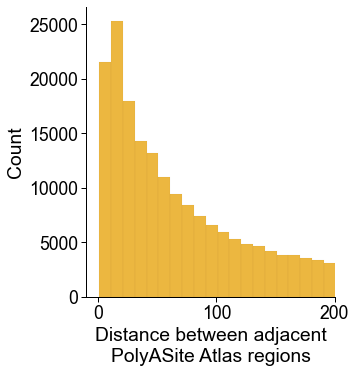

In [12]:
df = pr.read_bed(pas_atlas_file)
df2 = pr.read_bed(pas_atlas_file)

temp = df.k_nearest(df2, k=2,
                    ties=None,
                    strandedness='same',
                    overlap=True,
                    how=None,
                    suffix='_b')

# get the stuff that isn't the same
temp = temp.df
print(len(temp.index))
temp = temp.loc[temp.Name!=temp.Name_b]
print(len(temp.index))

# limit to things w/i a certain number of kb
temp['abs_dist'] = abs(temp.Distance)
temp = temp.loc[temp.abs_dist <= max_dist]
len(temp.index)

ax = sns.displot(temp, kind='hist', x='abs_dist', binwidth=10, color=c)
ax.set(xlim=(-10,200))
ax.set(xlabel='Distance between adjacent\nPolyASite Atlas regions')
fname = 'figures/dists_polya_atlast.pdf'
plt.savefig(fname, dpi=500)

161127
80676


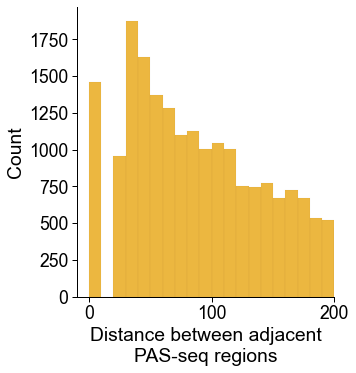

In [13]:
df = pr.read_bed(pas_file)
df2 = pr.read_bed(pas_file)

temp = df.k_nearest(df2, k=2,
                    ties=None,
                    strandedness='same',
                    overlap=True,
                    how=None,
                    suffix='_b')

# get the stuff that isn't the same
temp = temp.df
print(len(temp.index))
temp = temp.loc[temp.Name!=temp.Name_b]
print(len(temp.index))

# limit to things w/i a certain number of kb
temp['abs_dist'] = abs(temp.Distance)
temp = temp.loc[temp.abs_dist <= max_dist]
len(temp.index)

ax = sns.displot(temp, kind='hist', x='abs_dist', binwidth=10, color=c)
ax.set(xlim=(-10,200))
ax.set(xlabel='Distance between adjacent\nPAS-seq regions')
fname = 'figures/dists_pas_seq.pdf'

plt.savefig(fname, dpi=500)

Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87189
# tess >= 1 tpm: 76035
Applying gene type and novelty subset
Number of tess reported: 72806
145612
72852


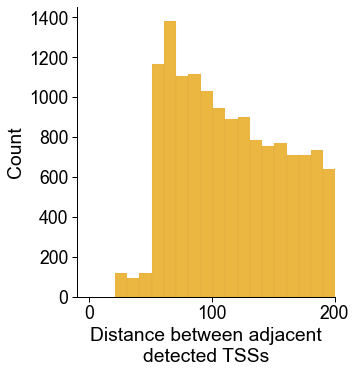

In [32]:
# Cerberus feats
feat = 'tes'
c_dict, order = get_sector_colors(cats=None)
c = c_dict[feat]
ca = cerberus.read(cerberus_h5)

ids = get_det_feats(cerberus_h5,
                    filt_ab,
                    feat,
                    how=feat,
                    gene_subset=gene_subset,
                    min_tpm=min_tpm)
if feat == 'tss':
    df = ca.tss.loc[ca.tss.Name.isin(ids)]
elif feat == 'tes':
    df = ca.tes.loc[ca.tes.Name.isin(ids)]
    
df2 = df.copy(deep=True)
df = pr.PyRanges(df)
df2 = pr.PyRanges(df2)

temp = df.k_nearest(df2, k=2,
                    ties=None,
                    strandedness='same',
                    overlap=True,
                    how=None,
                    suffix='_b')

# get the stuff that isn't the same
temp = temp.df
print(len(temp.index))
temp = temp.loc[temp.Name!=temp.Name_b]
print(len(temp.index))

# get the stuff that is from the same gene
temp = temp.loc[temp.gene_id==temp.gene_id_b]

# limit to things w/i a certain number of kb
temp['abs_dist'] = abs(temp.Distance)
temp = temp.loc[temp.abs_dist <= max_dist]
len(temp.index)

ax = sns.displot(temp, kind='hist', x='abs_dist', binwidth=10, color=c)
ax.set(xlim=(-10,200))
ax.set(xlabel='Distance between adjacent\ndetected TSSs')
fname = 'figures/dists_cerb_tes.pdf'

plt.savefig(fname, dpi=500)

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/paper_rnawg/proc_revisions/utils.py:2109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 73812
# tsss >= 1 tpm: 64913
Applying gene type and novelty subset
Number of tsss reported: 61664
123327
61676


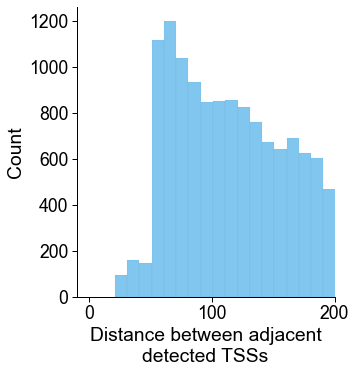

In [29]:
# Cerberus feats
feat = 'tss'
c_dict, order = get_sector_colors(cats=None)
c = c_dict[feat]
ca = cerberus.read(cerberus_h5)

ids = get_det_feats(cerberus_h5,
                    filt_ab,
                    feat,
                    how=feat,
                    gene_subset=gene_subset,
                    min_tpm=min_tpm)
if feat == 'tss':
    df = ca.tss.loc[ca.tss.Name.isin(ids)]
elif feat == 'tes':
    df = ca.tes.loc[ca.tes.Name.isin(ids)]
    
df2 = df.copy(deep=True)
df = pr.PyRanges(df)
df2 = pr.PyRanges(df2)

temp = df.k_nearest(df2, k=2,
                    ties=None,
                    strandedness='same',
                    overlap=True,
                    how=None,
                    suffix='_b')

# get the stuff that isn't the same
temp = temp.df
print(len(temp.index))
temp = temp.loc[temp.Name!=temp.Name_b]
print(len(temp.index))

# get the stuff that is from the same gene
temp = temp.loc[temp.gene_id==temp.gene_id_b]

# limit to things w/i a certain number of kb
temp['abs_dist'] = abs(temp.Distance)
temp = temp.loc[temp.abs_dist <= max_dist]
len(temp.index)

ax = sns.displot(temp, kind='hist', x='abs_dist', binwidth=10, color=c)
ax.set(xlim=(-10,200))
ax.set(xlabel='Distance between adjacent\ndetected TSSs')
fname = 'figures/dists_cerb_tss.pdf'

plt.savefig(fname, dpi=500)

In [28]:
temp.loc[temp.abs_dist<10]

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tss,Start_b,End_b,Strand_b,Name_b,source_b,novelty_b,gene_id_b,tss_b,Distance,abs_dist
249,chr1,203795572,203795756,+,ENSG00000058673_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000058673,1,203795663,203795764,+,ENSG00000257315_1,"v40,v29,lapa,gtex,encode_rampage,pls,lrgasp_ca...",Known,ENSG00000257315,1,0,0
794,chr1,65420601,65420718,+,ENSG00000116678_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000116678,1,65420536,65420766,+,ENSG00000213625_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000213625,1,0,0
1221,chr1,99969928,99970107,+,ENSG00000117620_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000117620,1,99969960,99970131,+,ENSG00000283761_1,"v40,v29,lapa,encode_cage,fantom_cage,encode_ra...",Known,ENSG00000283761,1,0,0
2775,chr1,235328348,235328640,+,ENSG00000152904_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000152904,1,235328519,235328625,+,ENSG00000285053_1,"v40,v29,lapa,encode_cage,fantom_cage,encode_ra...",Known,ENSG00000285053,1,0,0
2976,chr1,19596928,19597029,+,ENSG00000158747_2,"v40,v29,lapa,encode_cage,fantom_cage,encode_ra...",Known,ENSG00000158747,2,19596926,19597120,+,ENSG00000173436_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000173436,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122830,chrX,155071085,155071186,-,ENSG00000214827_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000214827,1,155071085,155071186,-,ENSG00000182712_1,"v40,lapa,encode_cage,fantom_cage,encode_rampag...",Known,ENSG00000182712,1,0,0
123079,chrX,149533884,149533985,-,ENSG00000241489_1,"v40,v29,lapa",Known,ENSG00000241489,1,149533832,149533933,-,ENSG00000241769_4,"v40,v29,lapa,gtex",Known,ENSG00000241769,4,0,0
123086,chrX,149533832,149533933,-,ENSG00000241769_4,"v40,v29,lapa,gtex",Known,ENSG00000241769,4,149533884,149533985,-,ENSG00000241489_1,"v40,v29,lapa",Known,ENSG00000241489,1,0,0
123208,chrX,71111478,71111625,-,ENSG00000285171_1,"v40,v29,lapa,encode_cage,fantom_cage,encode_ra...",Known,ENSG00000285171,1,71111499,71111656,-,ENSG00000147168_1,"v40,v29,lapa,gtex,encode_cage,fantom_cage,enco...",Known,ENSG00000147168,1,0,0
